# Varmeligning, 2D (i rom)

Det er en utvidelse av de siste kapitlene: vi bruker samme diskretisering som Poissons ligning til å få en differensialligning

$$
\vec{u}_t = A\vec{u} - \vec{F}
$$

Det kan da løses med Eulers metode. Vi følger altså nøyaktig samme oppskrift fra 9, bare at $A$ og $\vec{F}$ kommer denne gangen fra 10 (istedenfor 8). 

## Eksempel

Her løser vi varmeligningen 
$$
u_t = u_{xx} + u_{yy}, \quad 0<x<1, 0<y<1, t>0
$$

Med samme randbetingelse som forrige kapittel: $u(t,x,0)=u(t,0,y)=u(t,1,y)=0$, $u(t,x,1)=\sin(\pi x)$, og i tillegg så tar vi initialbetingelse $u(0,x,y)=y$.

Vi starter på akkurat samme måte som for poissonlikningen. Koden under er hentet fra kapittel 10.

In [7]:
#
# Vi henter kode fra kap. 10
# 

import numpy as np

# Oppsett av matrisen L
m=20                   
x=np.linspace(0,1,m+2) 
h=x[1]-x[0]            
Ln = (1/h**2)*(np.diag((m-1)*[1],-1) + np.diag((m)*[-2],0) + np.diag((m-1)*[1],1))
In = np.eye(m)

n=20
y=np.linspace(0,1,n+2)
k = y[1]-y[0]
Lm = (1/k**2)*(np.diag((n-1)*[1],-1) + np.diag((n)*[-2],0) + np.diag((n-1)*[1],1))
Im = np.eye(n)

L = np.kron(Ln,Im) + np.kron(In,Lm)

# Vi setter opp F
Zm_l = np.zeros(m)
Zm_l[0] = -1/(h**2)
Zm_r = np.zeros(m)
Zm_r[-1] = -1/(h**2)
Zn_l = np.zeros(n)
Zn_l[0] = -1/(k**2)
Zn_r = np.zeros(n)
Zn_r[-1] = -1/(k**2)

# funksjonen som gir u(x,0)
def f1(x):
    return 0*x

# funksjonen som gir u(x,1)
def f2(x):
    return np.sin(np.pi*x)

# funksjonen som gir u(y,0)
def f3(y):
    return 0*y

# funksjonen som gir u(y,1)
def f4(y):
    return 0*y

F = np.kron(f1(x[1:-1]),Zn_l) + np.kron(f2(x[1:-1]),Zn_r) + np.kron(Zm_l,f3(y[1:-1])) + np.kron(Zm_r,f4(y[1:-1]))


### Løsning med Eulers metode

Nå har vi fått ligningen

$$
\vec{u}_t = A\vec{u} - \vec{F},
$$

som kan løses med Eulers metode:

$$
\vec{u}_{n+1} = \vec{u}_n + h\big( A\vec{u}_n - \vec{F} \big)
$$

med tilstrekkelig små tidssteg $t_n = nk$. Ellers kan vi bruke baklengs Euler

$$
\vec{u}_{n+1} = \vec{u}_n + h\big( A\vec{u}_{n+1} - \vec{F} \big),
$$

som resulterer i et lineært system

$$
(I - hA) \vec{u}_{n+1} = \vec{u}_n - h\vec{F}.
$$

Vi viser løsningen med (forlengs) Euler under:

In [8]:
# Eulers metode for generell funksjon f
# trenger initialverdi x_0, initialtid a og sluttid b, og antall tidssteg N
def euler(f,x0,a,b,N):
    t = np.linspace(a,b,N)
    x = np.zeros((N,x0.size))
    x[0,:] = x0
    for i in np.arange(N-1):
        x[i+1,:] = x[i,:] + (t[i+1]-t[i])*(f(x[i],t[i]))
    return x,t

# funksjonen som er høyre side av den differentialligningen, her lik Ax - F
def f(x,t):
    return L @ x - F

# setter opp et rutenett, med indexing u(x_i,y_j)
X, Y = np.meshgrid(x[1:-1], y[1:-1], indexing='ij')

# vi setter initialverdiene u(x,y,0) = y
U0 = Y

# vektorisering av initialverdien
u0 = np.reshape(U0, m*n)

# løs med Eulers metode for tider 0<t<0.5, med N=10.000 steg
# vi trenger mange steg siden vi bruker forlengs Euler!
u, t = euler(f, u0, 0, 0.5, 10000)

Vi plotter løsningene. 

Prøv med ulike antall tidssteg. Når antall tidssteg blir mange så nærmer vi oss likevektstilstanden som er løsningen vi kjenner fra kap 10.

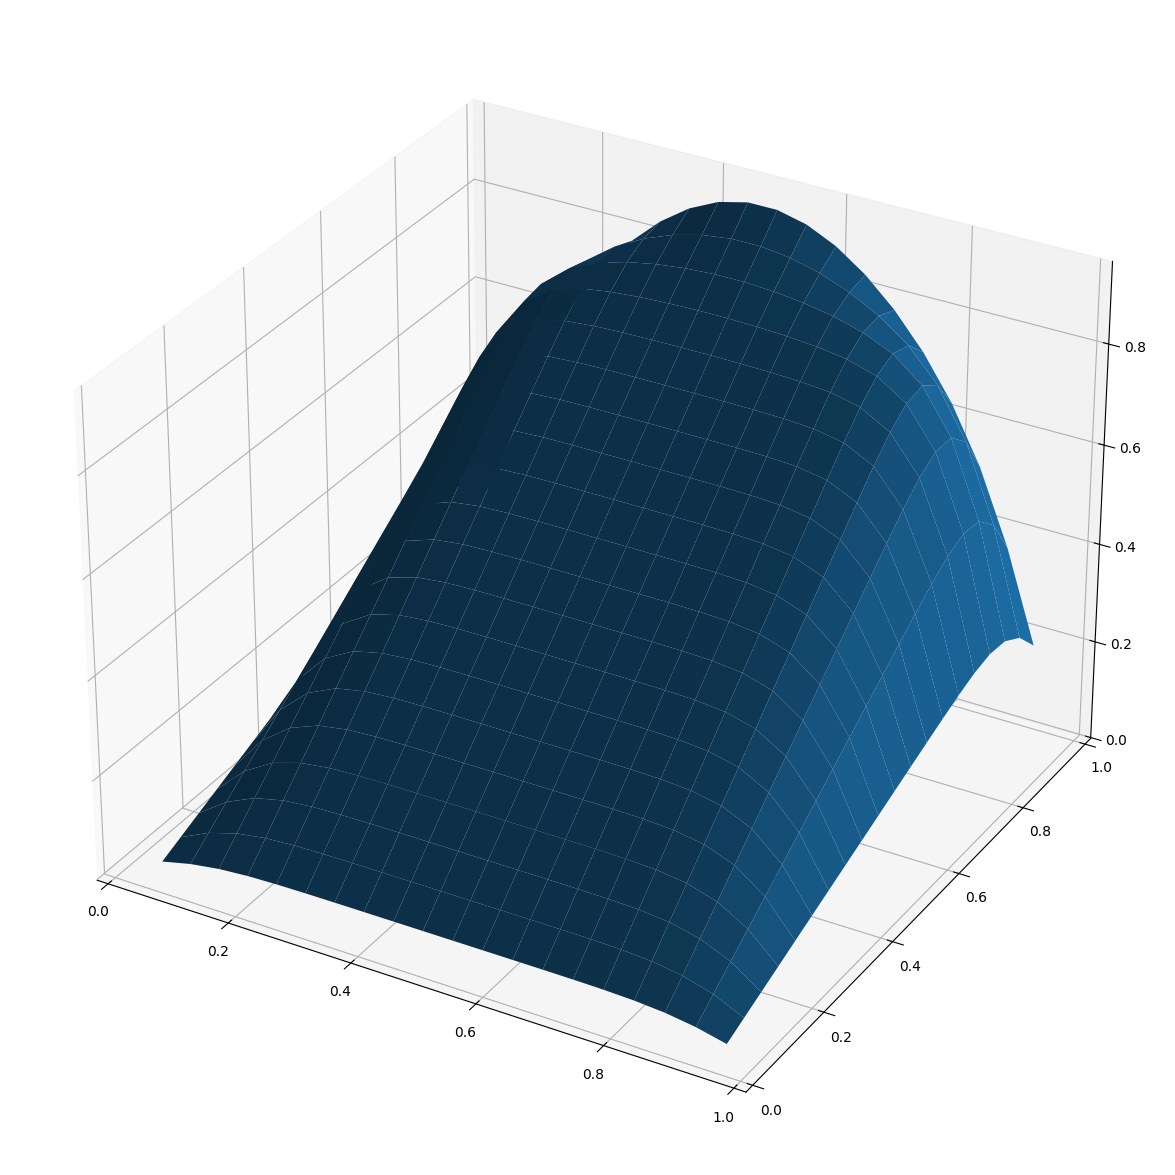

In [16]:
# en 3d-plott

import matplotlib.pyplot as plt

fig,ax2 = plt.subplots(subplot_kw ={"projection":"3d"}, figsize=(15,15))

# vi plotter verdiene etter 500 tidssteg
Z = np.reshape(u[500,:],(m,n))
ax2.plot_surface(X, Y, Z)
plt.show()


## Farger og animasjoner

Når det er varmen som plottes, er det ofte bedre å vise løsningen ved hjelpe av farger.

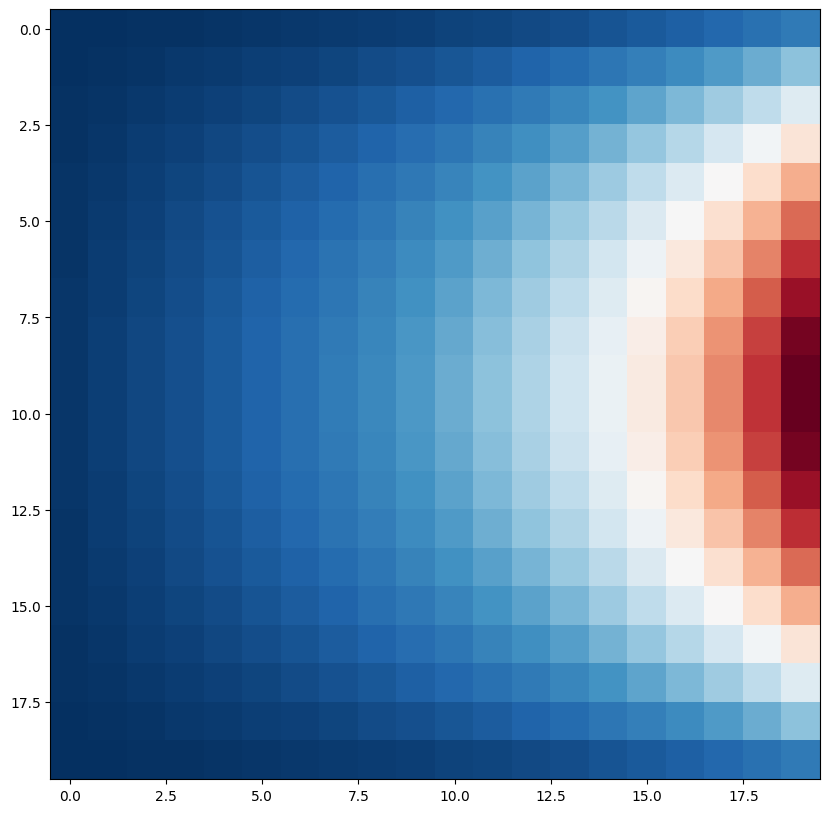

In [15]:
import matplotlib.animation as animation

from IPython.display import HTML

# setter opp figuren
fig, ax = plt.subplots(figsize=(15,10))

ims = []
for i in range(90):
    # fargebilde etter 100*i tidssteg
    im = ax.imshow(-np.reshape(u[100*i,:],(m,n)),cmap='RdBu', animated=True)
    if i == 0:
        # fargebilde ved initialtid
        ax.imshow(-np.reshape(u[0,:],(m,n)),cmap='RdBu')  # initialbilde
    ims.append([im])

# lag animasjonen
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

HTML(ani.to_jshtml())